In [15]:
import numpy as np
import matplotlib.pyplot as plt
import fdscheme as fds
from tabulate import tabulate
from sympy import *

In [24]:
def y(t):
    r=2
    return (4*np.sqrt(r)/(np.e**(np.sqrt(r)*t)+np.e**(-np.sqrt(r)*t)))

In [25]:
x = symbols('x', cls=Function)
t = Symbol('t')
diffeq = Eq(x(t).diff(t)+x(t)/2*sqrt(4*r-x(t)**2), 0)
dsolve(diffeq, x(t))

Eq(Piecewise((-sqrt(2)*acosh(2*sqrt(2)/x(t))/4, 8/Abs(x(t)**2) > 1), (sqrt(2)*I*asin(2*sqrt(2)/x(t))/4, True)), C1 - t/2)

In [27]:
def y_dot(t, x):
    return -np.sqrt(r*x**2 - (x**4)/4)

def y(t, y0):
    return (4*np.sqrt(r)/(np.e**(np.sqrt(r)*t)+np.e**(-np.sqrt(r)*t)))

would you like to print the data?(y/n): n
Okay, I will save the file to error_table.txt for future reference!



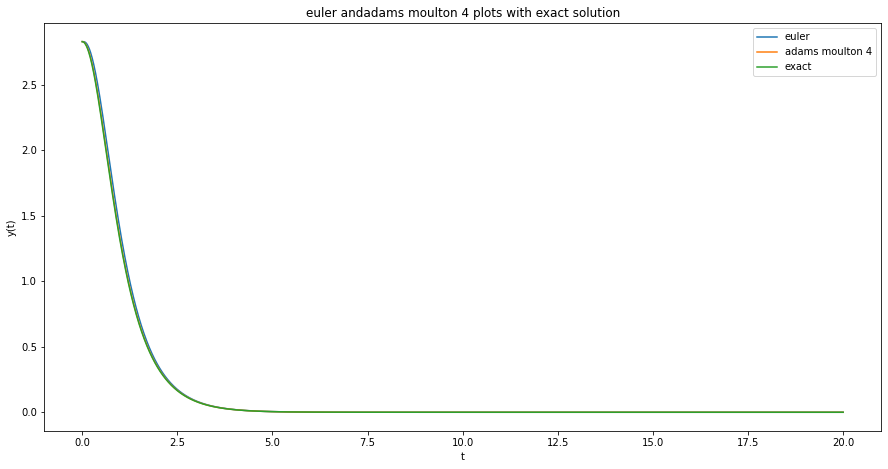

In [38]:
t_min = 0
t_max = 20
h = 0.01
r=2
y0 = np.array([2*np.sqrt(r)-1e-15])

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(y_dot, y0, t_min, t_max, h)
euler, name = sol.euler()
adams, name1 = sol.adams_moulton4()
exact = sol.exact_solution(y)
error = fds.Error(exact, euler, y0.size).relative_error()
error1 = fds.Error(exact, adams, y0.size).relative_error()

rows = np.zeros((t.size,6))
first_row = ['t', name, name1, 'exact', '% euler error', '% adams error']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = euler[0, i]
    rows[i,2] = adams[0, i]
    rows[i,3] = exact[0, i]
    rows[i,4] = 100*error[0, i]
    rows[i,5] = 100*error1[0, i]
    table.append(rows[i,:].tolist())

# plotting
print_data = input('would you like to print the data?(y/n): ')
while print_data != 'y' or print_data != 'n':
    if print_data == 'y':
        print('\nOkay, I will also save the data to error_table.txt for future reference!\n\n')
        title = 'data with exact solution and relative error for h=' + str(h)
        title = title.center(20)
        print(title, '\n')
        print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
        print('\n')
        break
    elif print_data == 'n':
        print('Okay, I will save the file to error_table.txt for future reference!\n')
        break
    else:
        print_data = input("That isn't a valid input. Would you like to print the data?(y/n): ")


table = tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid')
with open('error_table.txt', 'w') as f:
    f.write(table)

plt.figure(figsize=(15,7.5))
plt.plot(t,euler[0,:], label=name)
plt.plot(t,adams[0,:], label=name1)
plt.plot(t,exact[0,:], label='exact')
plt.title(name + ' and' + name1 + ' plots with exact solution')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()
plt.show()

Problem 3

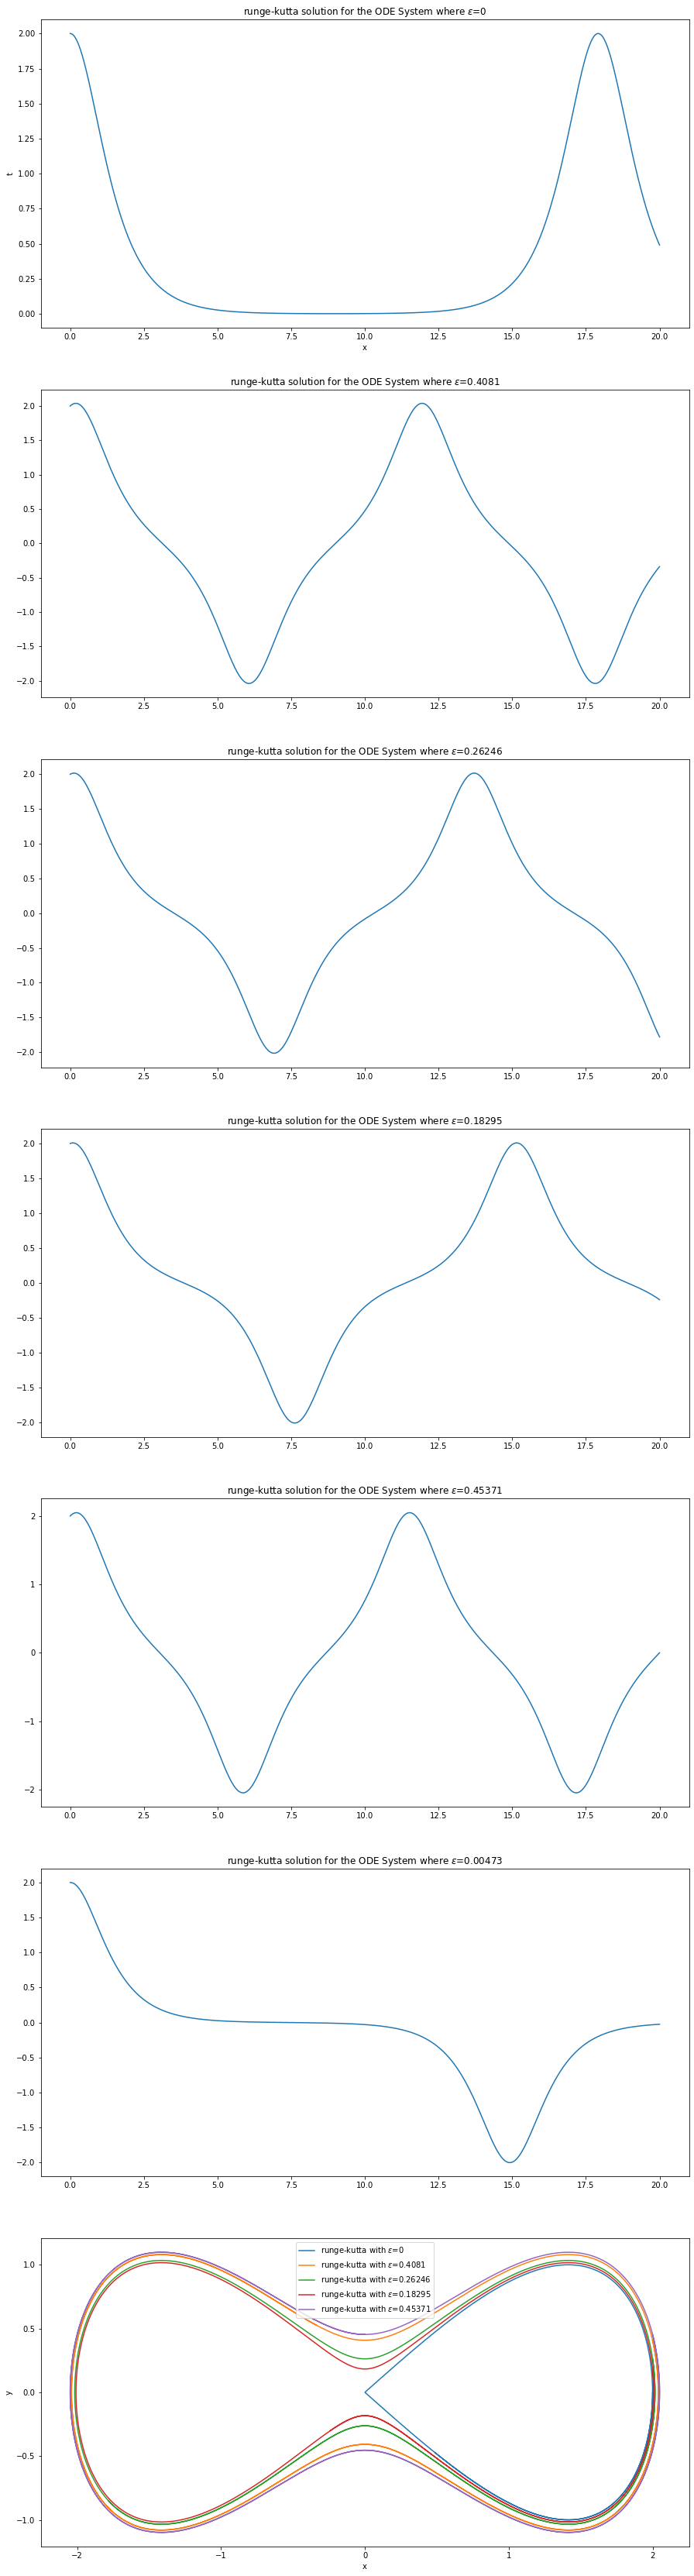

In [3]:
import random as rand

def ODE_System(t, X):
    x = float(X[1])
    y = -0.5*float(X[0])**3 + r*float(X[0])
    system = np.array([x,y])
    return system
    
#Define global variables
r = 1
epsilon = 0
start_time = 0
stop_time = 20
time_step = 0.01
X0 = np.array([2*np.sqrt(r), epsilon])

#implement scheme
time = fds.Grid(start_time, stop_time, time_step).create_grid()
solution = fds.Scheme(ODE_System, X0, start_time, stop_time, time_step)
numeric, name = solution.runge_kutta()

plt.figure(figsize=(15,60))
plt.subplot(7,1,1)
plt.plot(time, numeric[0,:])
plt.xlabel('x')
plt.ylabel('t')
plt.title(name + ' solution for the ODE System where $\epsilon$=' + str(epsilon))

for i in range(0, 5):
    plt.subplot(7,1,7)
    plt.plot(numeric[0,:], numeric[1,:], label = name + ' with $\epsilon$=' + str(epsilon))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    epsilon = np.random.uniform(0, 1)
    epsilon = round(epsilon, 5)
    X0 = np.array([2*np.sqrt(r), epsilon])
    solution = fds.Scheme(ODE_System, X0, start_time, stop_time, time_step)
    numeric, name = solution.runge_kutta()
    
    plt.subplot(7,1, i+2)
    plt.plot(time, numeric[0,:])
    plt.title(name + ' solution for the ODE System where $\epsilon$=' + str(epsilon))
    
    

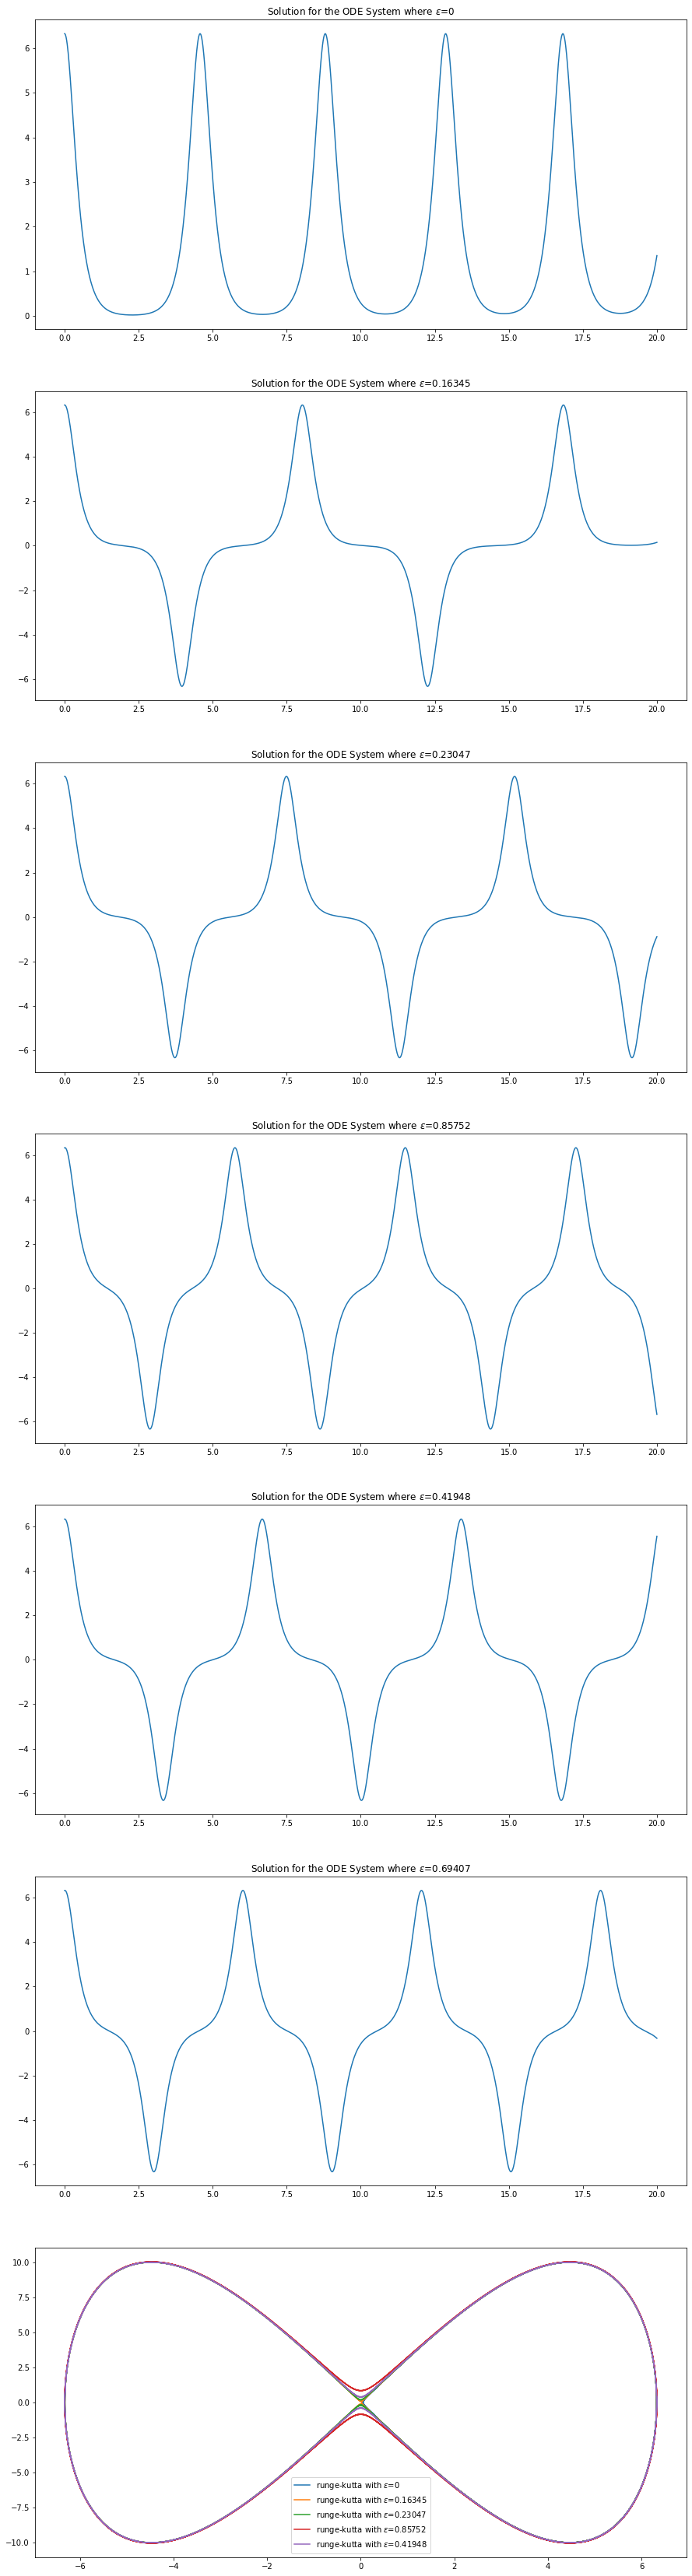

In [147]:
r = 10
epsilon = 0
start_time = 0
stop_time = 20
time_step = 0.01
X0 = np.array([2*np.sqrt(r), epsilon])

#implement scheme
time = fds.Grid(start_time, stop_time, time_step).create_grid()
solution = fds.Scheme(ODE_System, X0, start_time, stop_time, time_step)
numeric, name = solution.runge_kutta()

plt.figure(figsize=(15,60))
plt.subplot(7,1,1)
plt.plot(time, numeric[0,:])
plt.title('Solution for the ODE System where $\epsilon$=' + str(epsilon))

for i in range(0, 5):
    plt.subplot(7,1,7)
    plt.plot(numeric[0,:], numeric[1,:], label = name + ' with $\epsilon$=' + str(epsilon))
    plt.legend()
    
    epsilon = np.random.uniform(0, 1)
    epsilon = round(epsilon, 5)
    X0 = np.array([2*np.sqrt(r), epsilon])
    solution = fds.Scheme(ODE_System, X0, start_time, stop_time, time_step)
    numeric, name = solution.runge_kutta()
    
    plt.subplot(7,1, i+2)
    plt.plot(time, numeric[0,:])
    plt.title('Solution for the ODE System where $\epsilon$=' + str(epsilon))

 how are you? hi
